<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Exercise%20Solutions/%F0%9F%9B%A0%20%2003_Computer_vision_%26_convolutional_neural_networks_in_TensorFlow_Exercise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Computer vision & convolutional neural networks in TensorFlow Exercise Solution

### Questionnaire
1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).
  - What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  - What is the kernel size?
  - What is the stride?
  - How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [26]:
# Importing the needed packages 
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

What are the key terms? e.g. explain convolution in your own words, pooling in your own words
- A **CNN** is a neural network algorithm used to recognize patters in data
 

### 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

I have my own image classifier dataset in my drive. This dataset contains 10 images of hot dog and another 10 images of random things (not a hot dog). 

The goal is to train a classifier that will classify between hot dog and not dog. 

Likewise feel free to use your own dataset. 

In [27]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Getting the data path 
data_dir = 'drive/MyDrive/CNN_dataset'
hot_dog_path = 'drive/MyDrive/CNN_dataset/hot_dog'
not_hot_dog_path = 'drive/MyDrive/CNN_dataset/not_hot_dog'

In [29]:
# Using ImageDataGenerators to read in images with labels 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating a instance of the ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1/255., 
                                   validation_split = 0.3) # creating a valid split in the train data

# Grabbing our image file from directories 
train_data = train_datagen.flow_from_directory(data_dir , 
                                               batch_size = 2 , 
                                               target_size = (200 , 200), 
                                               class_mode = 'binary', 
                                               seed = 42 , 
                                               subset = 'training')

valid_data = train_datagen.flow_from_directory(data_dir , 
                                               batch_size = 2 , 
                                               target_size = (200 , 200) , 
                                               class_mode = 'binary' , 
                                               seed = 42 , 
                                               subset = 'validation')

Found 14 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


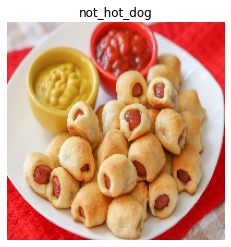

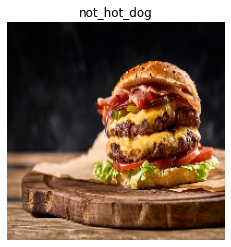

In [30]:
# Let's do a simple visualization (checking purpose)
x , y  = train_data.next()
for i in range(2):
  image = x[i]
  label = y[i]
  plt.axis(False)
  # print(label) --> for checking whether it's plotting right ones
  if label == 1.0:
    label = 'not_hot_dog'
  else:
    label = 'hot_dog'
  plt.title(label)
  plt.imshow(image)
  plt.show()

In [31]:
x.shape

(2, 200, 200, 3)

In [32]:
# Building a simple model 
from tensorflow.keras import layers 

model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (200 , 200, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 2)       8         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 200, 200, 2)       6         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 200, 200, 2)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 80001     
Total params: 80,015
Trainable params: 80,015
Non-trainable params: 0
__________________________________________________

In [33]:
# Compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fit the model 
history = model.fit(train_data , 
                    epochs = 20 , 
                    validation_data = valid_data )

Epoch 1/20
7/7 [==============================] - 6s 896ms/step - loss: 0.9484 - accuracy: 0.4286 - val_loss: 0.7271 - val_accuracy: 0.6000
Epoch 2/20
7/7 [==============================] - 5s 728ms/step - loss: 0.4720 - accuracy: 0.7857 - val_loss: 0.7373 - val_accuracy: 0.4000
Epoch 3/20
7/7 [==============================] - 5s 716ms/step - loss: 0.3734 - accuracy: 0.7857 - val_loss: 0.8230 - val_accuracy: 0.4000
Epoch 4/20
7/7 [==============================] - 5s 762ms/step - loss: 0.2723 - accuracy: 0.8571 - val_loss: 0.8955 - val_accuracy: 0.8000
Epoch 5/20
7/7 [==============================] - 5s 718ms/step - loss: 0.1943 - accuracy: 1.0000 - val_loss: 0.9630 - val_accuracy: 0.8000
Epoch 6/20
7/7 [==============================] - 5s 698ms/step - loss: 0.1383 - accuracy: 1.0000 - val_loss: 1.0994 - val_accuracy: 0.6000
Epoch 7/20
7/7 [==============================] - 5s 746ms/step - loss: 0.0761 - accuracy: 1.0000 - val_loss: 1.1139 - val_accuracy: 0.2000
Epoch 8/20
7/7 [====

### 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [34]:
# Lets import learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [35]:
# Again fitting the same model but with our lr scheduler 

from tensorflow.keras import layers 

lr_model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (200 , 200, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compiling the model
lr_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fit the model 
lr_history = lr_model.fit(train_data , 
                    epochs = 10 , 
                    validation_data = valid_data  , 
                    callbacks = [lr_scheduler])

Epoch 1/10
7/7 [==============================] - 6s 912ms/step - loss: 0.7244 - accuracy: 0.4286 - val_loss: 0.6495 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 5s 677ms/step - loss: 0.6941 - accuracy: 0.7857 - val_loss: 0.7198 - val_accuracy: 0.4000
Epoch 3/10
7/7 [==============================] - 5s 630ms/step - loss: 0.6509 - accuracy: 0.9286 - val_loss: 0.7933 - val_accuracy: 0.4000
Epoch 4/10
7/7 [==============================] - 5s 627ms/step - loss: 0.6410 - accuracy: 0.8571 - val_loss: 0.8674 - val_accuracy: 0.4000
Epoch 5/10
7/7 [==============================] - 4s 695ms/step - loss: 0.6348 - accuracy: 0.7857 - val_loss: 0.9372 - val_accuracy: 0.4000
Epoch 6/10
7/7 [==============================] - 5s 677ms/step - loss: 0.6258 - accuracy: 0.8571 - val_loss: 0.9214 - val_accuracy: 0.4000
Epoch 7/10
7/7 [==============================] - 5s 739ms/step - loss: 0.6144 - accuracy: 0.8571 - val_loss: 0.8943 - val_accuracy: 0.4000
Epoch 8/10
7/7 [====

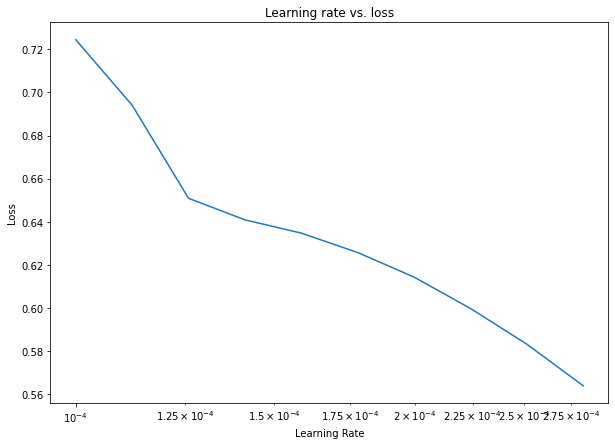

In [41]:
# Plot the learning rate versus the loss (to figure out where is the inflection point)
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, lr_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [47]:
# Our learning rate from the graph above 
lr = 2 * 1e-4
lr

0.0002

In [45]:
# Again fitting the same model but with our lr scheduler 

from tensorflow.keras import layers 

lr_model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (200 , 200, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compiling the model
lr_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam(learning_rate = lr) , 
              metrics = ['accuracy'])

# Fit the model 
lr_history = lr_model.fit(train_data , 
                    epochs = 10 , 
                    validation_data = valid_data)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.6910 - accuracy: 0.3571 - val_loss: 0.6953 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 5s 738ms/step - loss: 0.6788 - accuracy: 0.6429 - val_loss: 0.6947 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 5s 628ms/step - loss: 0.6588 - accuracy: 0.7143 - val_loss: 0.6833 - val_accuracy: 0.8000
Epoch 4/10
7/7 [==============================] - 5s 631ms/step - loss: 0.6483 - accuracy: 0.6429 - val_loss: 0.6672 - val_accuracy: 0.8000
Epoch 5/10
7/7 [==============================] - 5s 700ms/step - loss: 0.6304 - accuracy: 0.7857 - val_loss: 0.6423 - val_accuracy: 0.6000
Epoch 6/10
7/7 [==============================] - 4s 669ms/step - loss: 0.6128 - accuracy: 0.8571 - val_loss: 0.6248 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 5s 736ms/step - loss: 0.6001 - accuracy: 0.7857 - val_loss: 0.6113 - val_accuracy: 0.8000
Epoch 8/10
7/7 [======

Wow! We cann see that our model has improved a bit. Tweaking the learning rate is really important. And remember we trained our model with only few samples (10 pics) try training your model with more data and the results will be better than this. 